In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import all datasources and convert them into pandas dataframes

path = '/Users/ilaydabekircan/Documents/Vision Bridge/DS Assignment/AssignmentData'

csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

for file in csv_files:
    df_name = file.split('.')[0]
    globals()[df_name] = pd.read_csv(os.path.join(path, file))

In [3]:
# print names of each dataframe
df_names = [name for name, obj in globals().items() if isinstance(obj, pd.DataFrame)]
df_names

['Customers',
 'ChannelsCampaigns',
 'Products',
 'StoresCampaigns',
 'Orders',
 'OrderItems',
 'Users',
 'AudiencesCampaigns',
 'Retailers',
 'MarketingCampaigns',
 'CampaignResults',
 'Tracking',
 'Channels',
 'Audiences',
 'Transactions',
 'BehavioralData',
 'Stores']

# BUYERS

In [4]:
print('Number of customers in our dataset', Customers['CustomerID'].nunique())
print('Number of customers who bought something:', Orders['CustomerID'].nunique())
print('Number of customers who didnt buy something:', Customers['CustomerID'].nunique() - Orders['CustomerID'].nunique())

Number of customers in our dataset 5000
Number of customers who bought something: 917
Number of customers who didnt buy something: 4083


Although most of the customers didn't buy anything, we can still learn from their behaviours such as their clicks. (BehavioralData)

In [5]:
def find_season(month_num):
    if month_num in [12, 1, 2]:
        return 1
    elif month_num in [3, 4, 5]:
        return 2
    elif month_num in [6, 7, 8]:
        return 3
    elif month_num in [9, 10, 11]:
        return 4

In [6]:
Customers['CustomerID'] = Customers['CustomerID'].astype(float)
Customers['RetailerID'] = Customers['RetailerID'].astype(float)
Customers.rename(columns = {'City': 'CustomerCity', 'State': 'CustomerState'}, inplace=True)
Customers['Occupation'] = Customers['Occupation'].fillna('Unknown')
Customers['Industry'] = Customers['Industry'].fillna('Unknown')


Orders['OrderDate'] = pd.to_datetime(Orders['OrderDate'])
Orders['OrderMonth'] = Orders['OrderDate'].dt.month
Orders['OrderDay'] = Orders['OrderDate'].dt.day
Orders['OrderWeekOfMonth'] = (Orders['OrderDate'].dt.day - 1) // 7 + 1
Orders['OrderSeason'] = Orders['OrderMonth'].apply(find_season)
Orders.drop(columns = ['OrderDate'], inplace = True)


CustomerBuys = Customers.merge(Orders, 
                               how = 'left',
                               on = 'CustomerID')
CustomerBuys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5083 entries, 0 to 5082
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5083 non-null   float64
 1   RetailerID        5083 non-null   float64
 2   Name              5083 non-null   object 
 3   Email             5083 non-null   object 
 4   Phone             5083 non-null   object 
 5   CustomerCity      5083 non-null   object 
 6   CustomerState     5083 non-null   object 
 7   Country           5083 non-null   object 
 8   Gender            5083 non-null   object 
 9   Age               5083 non-null   object 
 10  EmploymentStatus  5083 non-null   object 
 11  Education         5083 non-null   object 
 12  Occupation        5083 non-null   object 
 13  Industry          5083 non-null   object 
 14  Income            5083 non-null   int64  
 15  CreatedAt         5083 non-null   object 
 16  OrderID           1000 non-null   float64


In [7]:
Orders

,OrderID,CustomerID,Count,TotalAmount,Status,OrderMonth,OrderDay,OrderWeekOfMonth,OrderSeason
0,1,4463,3,117.54,Pending,9,10,2,4
1,2,4594,2,128.33,Completed,5,17,3,2
2,3,3281,1,22.74,Completed,11,26,4,4
3,4,4168,1,5579.64,Pending,9,21,3,4
4,5,2687,1,57.60,Shipped,12,15,3,1
...,...,...,...,...,...,...,...,...,...
995,996,4766,3,238.32,Pending,6,15,3,3
996,997,1426,1,35.97,Pending,12,4,1,1
997,998,4096,1,0.00,Shipped,12,15,3,1
998,999,2962,1,107.97,Shipped,8,15,3,3


In [8]:
no_orders = CustomerBuys[CustomerBuys['OrderID'].isna()]

num_customers_no_orders = no_orders['CustomerID'].nunique()

print(f"Number of customers who didn't buy anything: {num_customers_no_orders}")


Number of customers who didn't buy anything: 4083


In [9]:
# Drop unnecessary columns, country is redundant because all of them are USA
CustomerBuys.drop(columns = ['Email', 'Phone', 'Country', 'CreatedAt'], inplace = True)
CustomerBuys.rename(columns={'Name': 'CustomerName'}, inplace=True)

In [10]:
OrderItems.drop(columns = ['OrderItemID'], inplace = True)

# price is shown for only one product so the total price must be calculated
OrderItems[OrderItems['ProductID'] == 1609]

,OrderID,ProductID,Price,Quantity
793,407,1609,23.03,3
1505,756,1609,23.03,4
1556,782,1609,23.03,2
1678,839,1609,23.03,1


In [11]:
# total price is calculated for each order id
OrderItems['TotalPrice'] = OrderItems['Price'] * OrderItems['Quantity']

OrderItems['OrderID'] = OrderItems['OrderID'].astype(float)

# products with missing price information are removed
OrderItems.dropna(subset = ['Price'], 
                  inplace = True)

OrderItems.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     1919 non-null   float64
 1   ProductID   1919 non-null   int64  
 2   Price       1919 non-null   float64
 3   Quantity    1919 non-null   int64  
 4   TotalPrice  1919 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 90.0 KB


In [12]:
CustomerBuys = CustomerBuys.merge(OrderItems, 
                                  how = 'left',
                                  on = 'OrderID')
CustomerBuys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6014
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        6015 non-null   float64
 1   RetailerID        6015 non-null   float64
 2   CustomerName      6015 non-null   object 
 3   CustomerCity      6015 non-null   object 
 4   CustomerState     6015 non-null   object 
 5   Gender            6015 non-null   object 
 6   Age               6015 non-null   object 
 7   EmploymentStatus  6015 non-null   object 
 8   Education         6015 non-null   object 
 9   Occupation        6015 non-null   object 
 10  Industry          6015 non-null   object 
 11  Income            6015 non-null   int64  
 12  OrderID           1932 non-null   float64
 13  Count             1932 non-null   float64
 14  TotalAmount       1932 non-null   float64
 15  Status            1932 non-null   object 
 16  OrderMonth        1932 non-null   float64


In [13]:
CustomerBuys[(CustomerBuys['TotalAmount'] != CustomerBuys['TotalPrice']) & (CustomerBuys['TotalAmount'].notna())]

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,TotalAmount,Status,OrderMonth,OrderDay,OrderWeekOfMonth,OrderSeason,ProductID,Price,Quantity,TotalPrice
8,9.0,40.0,Kayla Garza,Seattle city,Washington,male,25 to 34 years,employed,graduate_or_professional_degree,sales_and_office_occupations,...,5445.58,Completed,2.0,7.0,1.0,1.0,3968.0,27.59,2.0,55.18
9,9.0,40.0,Kayla Garza,Seattle city,Washington,male,25 to 34 years,employed,graduate_or_professional_degree,sales_and_office_occupations,...,5445.58,Completed,2.0,7.0,1.0,1.0,6351.0,2695.20,2.0,5390.40
21,21.0,22.0,Elizabeth Moon,San Diego city,California,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,145.92,Completed,10.0,8.0,2.0,4.0,8021.0,29.99,4.0,119.96
22,21.0,22.0,Elizabeth Moon,San Diego city,California,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,145.92,Completed,10.0,8.0,2.0,4.0,1273.0,11.99,2.0,23.98
23,21.0,22.0,Elizabeth Moon,San Diego city,California,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,145.92,Completed,10.0,8.0,2.0,4.0,3502.0,0.66,3.0,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4984.0,54.0,Jessica Owens,San Jose city,California,male,25 to 34 years,employed,bachelors_degree,management_business_science_arts,...,172.73,Shipped,8.0,9.0,2.0,3.0,3788.0,9.59,3.0,28.77
5996,4984.0,54.0,Jessica Owens,San Jose city,California,male,25 to 34 years,employed,bachelors_degree,management_business_science_arts,...,172.73,Shipped,8.0,9.0,2.0,3.0,6524.0,35.99,4.0,143.96
6011,4999.0,6.0,Shane Wong,Tucson city,Arizona,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,40.69,Shipped,5.0,12.0,2.0,2.0,9496.0,7.79,1.0,7.79
6012,4999.0,6.0,Shane Wong,Tucson city,Arizona,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,40.69,Shipped,5.0,12.0,2.0,2.0,271.0,3.59,2.0,7.18


In [14]:
Products = Products.drop(columns = ['CreatedAt', 'SKU']).rename(columns = {'Name': 'ProductName', 'Price': 'ProductPrice'})
Products['ProductID'] = Products['ProductID'].astype(float)
Products['RetailerID'] = Products['RetailerID'].astype(float)

deneme = CustomerBuys.merge(Products,
                   how = 'left',
                   on = 'ProductID')

In [15]:
deneme

,CustomerID,RetailerID_x,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,OrderSeason,ProductID,Price,Quantity,TotalPrice,RetailerID_y,ProductName,MainCategory,SubCategory,ProductPrice
0,1.0,48.0,Courtney Bates,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,11.0,Alicia Silva,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,66.0,George Hernandez,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,24.0,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,2.0,5419.0,27.59,3.0,82.77,91.0,REMAXX Mini Portable Desktop Vacuum Cleaner Co...,appliances,All Appliances,27.59
4,5.0,38.0,Kelly Thomas,San Diego city,California,male,65 to 74 years,employed,less_than_high_school_diploma,sales_and_office_occupations,...,1.0,1440.0,23.99,4.0,95.96,24.0,Jewels Galaxy Jewellery For Women Stackable Ri...,stores,Amazon Fashion,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,4998.0,56.0,Pamela Hayes,Boston city,Massachusetts,female,18 to 24 years,employed,some_college_or_associates_degree,production_transportation_material_moving,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6011,4999.0,6.0,Shane Wong,Tucson city,Arizona,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,2.0,9496.0,7.79,1.0,7.79,63.0,HomeStrap Innerwear/Undergarment Organizer 12+...,home & kitchen,Home Storage,7.79
6012,4999.0,6.0,Shane Wong,Tucson city,Arizona,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,2.0,271.0,3.59,2.0,7.18,57.0,Vamsha Nature Care Air Purifying Money Plants ...,home & kitchen,Garden & Outdoors,3.59
6013,4999.0,6.0,Shane Wong,Tucson city,Arizona,male,18 to 24 years,employed,bachelors_degree,production_transportation_material_moving,...,2.0,988.0,12.86,2.0,25.72,67.0,NEUTRON Royal Analog White and Orange Color Di...,accessories,Watches,12.86


In [16]:
Products[Products['ProductID'] == 5.0]

,ProductID,RetailerID,ProductName,MainCategory,SubCategory,ProductPrice
4,5.0,98.0,A2D? 11807. Dual Tone Shark Fin Shape Decorati...,car & motorbike,Car Electronics,7.19


In [17]:
CustomerBuys[CustomerBuys['ProductID'] == 5.0]

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,TotalAmount,Status,OrderMonth,OrderDay,OrderWeekOfMonth,OrderSeason,ProductID,Price,Quantity,TotalPrice
2657,2198.0,89.0,David Pollard,Detroit city,Michigan,female,55 to 64 years,employed,high_school_graduate,sales_and_office_occupations,...,112.74,Shipped,6.0,26.0,4.0,3.0,5.0,7.19,2.0,14.38


The above examples show that a product can be sold by different retailers. Thus, we don't need RetailID column in Products.

In [18]:
Products.drop(columns = ['RetailerID'], inplace = True)
CustomerBuys = CustomerBuys.merge(Products,
                                  how = 'left',
                                  on = 'ProductID')
CustomerBuys.head(3)

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,OrderWeekOfMonth,OrderSeason,ProductID,Price,Quantity,TotalPrice,ProductName,MainCategory,SubCategory,ProductPrice
0,1.0,48.0,Courtney Bates,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,11.0,Alicia Silva,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,66.0,George Hernandez,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
FlagDf = CustomerBuys.groupby('CustomerID')['TotalAmount'].sum().reset_index()
FlagDf.rename(columns={'TotalAmount': 'PurchaseFlag'}, inplace=True)

# Create a flag: 1 if PurchaseFlag is greater than 0, else 0
FlagDf['PurchaseFlag'] = FlagDf['PurchaseFlag'].apply(lambda x: 1 if x > 0 else 0)

CustomerBuys = CustomerBuys.merge(FlagDf, on='CustomerID', how='left')
CustomerBuys.loc[CustomerBuys['PurchaseFlag'] == 0, ['Count', 'TotalAmount', 'Price', 'Quantity', 'TotalPrice']] = 0
CustomerBuys.head(3)

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,OrderSeason,ProductID,Price,Quantity,TotalPrice,ProductName,MainCategory,SubCategory,ProductPrice,PurchaseFlag
0,1.0,48.0,Courtney Bates,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
1,2.0,11.0,Alicia Silva,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,3.0,66.0,George Hernandez,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0


Transactions is not used because it shows only 100 unique OrderID where there are 1000 OrderID in the main dataset

BehavioralData is not used because of the below example. In the main dataset (CustomerBuys), we don't have any of the CustomerID&ProductID combination shown in BehavioralData dataset.

In [20]:
BehavioralData[BehavioralData['CustomerID'] == 4456.0]

,BehaviorID,CustomerID,ProductID,Timestamp,ClickSource,PageModule,ActionType,DwellTimeSeconds,DwellTimeCategory
456,457,4456,129,2024-08-07 01:06:35.378677,home,specification,view,211,t5
621,622,4456,9959,2024-08-04 12:02:35.380672,sale,bottom,purchase,219,t5
2095,2096,4456,8899,2024-08-06 16:50:35.399594,search,NaN,view,159,t5
3830,3831,4456,2010,2024-07-14 23:48:35.414554,cart,specification,view,70,t4
5460,5461,4456,4591,2024-07-23 06:13:35.429539,cart,comments,add_to_cart,54,t3
6303,6304,4456,272,2024-07-28 05:53:35.436521,home,bottom,add_to_cart,233,t5
6478,6479,4456,9045,2024-07-25 23:37:35.438515,category,NaN,purchase,197,t5
6675,6676,4456,4457,2024-08-05 16:15:35.439513,search,comments,purchase,284,t5
7271,7272,4456,9936,2024-07-25 16:29:35.444500,search,comments,purchase,256,t5


In [21]:
CustomerBuys[CustomerBuys['CustomerID'] == 4456.0]

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,OrderSeason,ProductID,Price,Quantity,TotalPrice,ProductName,MainCategory,SubCategory,ProductPrice,PurchaseFlag
5338,4456.0,48.0,Courtney Gordon,Albuquerque city,New Mexico,male,25 to 34 years,employed,some_college_or_associates_degree,production_transportation_material_moving,...,1.0,3139.0,59.99,1.0,59.99,T Teclusive Ldnio 2500W 10A Smart WiFi Extensi...,industrial supplies,Industrial & Scientific Supplies,59.99,1


Some dataframes are only keep key items and they can only be used for merging dataframes
- **ChannelsCampaigns:** StoreID, ChannelID
- **StoresCampaigns:** StoreID, CampaignID
- **AudiencesCampaigns:** AudienceID, CampaignID

# SELLERS

In [22]:
Stores.rename(columns = {'Name': 'StoreName', 'City': 'StoreCity', 'State': 'StoreState'}, inplace=True)

Stores.drop(columns = ['Country'], inplace=True) # only USA

SellerSells = Stores.merge(ChannelsCampaigns, 
                      how = 'left', 
                      on = 'StoreID').merge(StoresCampaigns, 
                                            how = 'left', 
                                            on = 'StoreID').merge(AudiencesCampaigns, 
                                                                  how = 'left', 
                                                                  on = 'CampaignID').drop(columns = ['CreatedAt'])
SellerSells.head(3)

,StoreID,RetailerID,StoreName,StoreCity,StoreState,channelID,CampaignID,audienceID
0,1,57,Store 57,Los Angeles city,California,42.0,60.0,64.0
1,1,57,Store 57,Los Angeles city,California,42.0,60.0,114.0
2,1,57,Store 57,Los Angeles city,California,42.0,60.0,124.0


By adding the keys, we can now use the information in Retailers, Audiences, Channels.

However, Retailers dataframe doesn't give us information about customer segmentation. (RetailerID, Name, ContactInfo, CreatedAt, UserID). 

We can only use this dataframe to use UserID as a key to merge with Users dataframe but Users also doesn't have any necessary information (UserID, Username, Email, PasswordHash, CreatedAt).

Therefore, we will only merge Audiences and Channels.

In [23]:
Audiences['AudienceID'] = Audiences['AudienceID'].astype(float)
Audiences = Audiences.drop(columns = ['CreatedAt', 'CriteriaValue'])
Audiences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AudienceID    250 non-null    float64
 1   RetailerID    250 non-null    int64  
 2   Insight       250 non-null    object 
 3   CriteriaType  172 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


**ASSUMPTION:** Audiences df has both RetailerID and AudienceID, but when merging this df with others, only AudienceID is used. The primary analysis is to be centered around how different audiences engage, meaning AudienceID is the core key.

In [24]:
SellerSells = SellerSells.merge(Audiences.drop(columns = ['RetailerID']),
                                how = 'left', 
                                left_on = 'audienceID', 
                                right_on = 'AudienceID').drop(columns = ['AudienceID'])
SellerSells.head(3)

,StoreID,RetailerID,StoreName,StoreCity,StoreState,channelID,CampaignID,audienceID,Insight,CriteriaType
0,1,57,Store 57,Los Angeles city,California,42.0,60.0,64.0,channel preference,video
1,1,57,Store 57,Los Angeles city,California,42.0,60.0,114.0,geographic,city
2,1,57,Store 57,Los Angeles city,California,42.0,60.0,124.0,promotion preference,NaN


Add campaign information

In [25]:
MarketingCampaigns['StartDate'] = pd.to_datetime(MarketingCampaigns['StartDate'])
MarketingCampaigns['EndDate'] = pd.to_datetime(MarketingCampaigns['EndDate'])
MarketingCampaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CampaignID  100 non-null    int64         
 1   Name        100 non-null    object        
 2   StartDate   100 non-null    datetime64[ns]
 3   EndDate     100 non-null    datetime64[ns]
 4   Budget      100 non-null    float64       
 5   CreatedAt   100 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.8+ KB


In [26]:
# All campaigns start and end at 21:50, so the time is redundant
MarketingCampaigns['StartTime'] = MarketingCampaigns['StartDate'].dt.time

# Check
MarketingCampaigns['StartTime'].sort_values() # ascending

0     21:50:33.556668
1     21:50:33.556719
2     21:50:33.556762
3     21:50:33.556768
4     21:50:33.556771
           ...       
95    21:50:33.556995
96    21:50:33.556997
97    21:50:33.556999
98    21:50:33.557002
99    21:50:33.557004
Name: StartTime, Length: 100, dtype: object

In [27]:
# keep only dates and remove times from StartDate and EndDate
MarketingCampaigns['StartDate'] = MarketingCampaigns['StartDate'].dt.date
MarketingCampaigns['EndDate'] = MarketingCampaigns['EndDate'].dt.date

# Reconvert to datetime
MarketingCampaigns['StartDate'] = pd.to_datetime(MarketingCampaigns['StartDate'])
MarketingCampaigns['EndDate'] = pd.to_datetime(MarketingCampaigns['EndDate'])

# Estimate how many days a campaign takes
MarketingCampaigns['CampaignDuration'] = (MarketingCampaigns['EndDate'] - MarketingCampaigns['StartDate']).dt.days
MarketingCampaigns.head(3)

,CampaignID,Name,StartDate,EndDate,Budget,CreatedAt,StartTime,CampaignDuration
0,1,Campaign A,2024-08-08,2024-09-07,7626.44,2024-08-08 21:50:33.558220,21:50:33.556668,30
1,2,Campaign B,2024-08-07,2024-09-06,3690.77,2024-08-07 21:50:33.558227,21:50:33.556719,30
2,3,Campaign C,2024-08-06,2024-09-05,5664.16,2024-08-06 21:50:33.558232,21:50:33.556762,30


Calculating 'WeekOfMonth'
- Subtracting 1 converts the day of the month into a zero-based index
- Dividing by 7 gives the zero-based week number
- Adding 1 converts the zero-based week index back to a one-based index

In [28]:
# there might be seasonal effects on campaigns
MarketingCampaigns['CampaignMonth'] = MarketingCampaigns['StartDate'].dt.month
MarketingCampaigns['CampaignWeekOfMonth'] = (MarketingCampaigns['StartDate'].dt.day - 1) // 7 + 1

MarketingCampaigns.head(3)

,CampaignID,Name,StartDate,EndDate,Budget,CreatedAt,StartTime,CampaignDuration,CampaignMonth,CampaignWeekOfMonth
0,1,Campaign A,2024-08-08,2024-09-07,7626.44,2024-08-08 21:50:33.558220,21:50:33.556668,30,8,2
1,2,Campaign B,2024-08-07,2024-09-06,3690.77,2024-08-07 21:50:33.558227,21:50:33.556719,30,8,1
2,3,Campaign C,2024-08-06,2024-09-05,5664.16,2024-08-06 21:50:33.558232,21:50:33.556762,30,8,1


In [29]:
# All campaigns take 30 days so the duration is redundant
MarketingCampaigns[MarketingCampaigns['CampaignDuration'] != 30]

# remove unnecessary columns
MarketingCampaigns = MarketingCampaigns.drop(columns = ['CreatedAt', 'StartTime', 'CampaignDuration', 'StartDate', 'EndDate'])
MarketingCampaigns['CampaignID'] = MarketingCampaigns['CampaignID'].astype(float)
MarketingCampaigns.rename(columns={'Name': 'CampaignName'}, inplace=True)
MarketingCampaigns.head(3)

,CampaignID,CampaignName,Budget,CampaignMonth,CampaignWeekOfMonth
0,1.0,Campaign A,7626.44,8,2
1,2.0,Campaign B,3690.77,8,1
2,3.0,Campaign C,5664.16,8,1


ResultID in CampaignResults is not a key since it's not used in any other dataframe

In [30]:
CampaignResults = CampaignResults.drop(columns = ['Timestamp', 'ResultID'])
CampaignResults['CampaignID'] = CampaignResults['CampaignID'].astype(float)
CampaignResults.head(3)

,CampaignID,Metric,Value
0,46.0,Clicks,2986
1,100.0,Impressions,709
2,12.0,Conversions,8833


In [31]:
SellerSells = SellerSells.merge(MarketingCampaigns, 
                                how = 'left', 
                                on = 'CampaignID').merge(CampaignResults, 
                                                         how = 'left', 
                                                         on = 'CampaignID')

In [32]:
Channels.rename(columns={'name': 'ChannelName'}, inplace=True)
Channels['channelID'] = Channels['channelID'].astype(float)
Channels.drop(columns = ['level', 'createdAt'], inplace = True)


SellerSells = SellerSells.merge(Channels, 
                                how = 'left', 
                                on = 'channelID')
SellerSells.head(3)

,StoreID,RetailerID,StoreName,StoreCity,StoreState,channelID,CampaignID,audienceID,Insight,CriteriaType,CampaignName,Budget,CampaignMonth,CampaignWeekOfMonth,Metric,Value,ChannelName,type
0,1,57,Store 57,Los Angeles city,California,42.0,60.0,64.0,channel preference,video,Campaign H,7225.58,6.0,2.0,Conversions,6868.0,Channel P1,email
1,1,57,Store 57,Los Angeles city,California,42.0,60.0,114.0,geographic,city,Campaign H,7225.58,6.0,2.0,Conversions,6868.0,Channel P1,email
2,1,57,Store 57,Los Angeles city,California,42.0,60.0,124.0,promotion preference,NaN,Campaign H,7225.58,6.0,2.0,Conversions,6868.0,Channel P1,email


In [33]:
CustomerBuys.head(3)

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,OrderSeason,ProductID,Price,Quantity,TotalPrice,ProductName,MainCategory,SubCategory,ProductPrice,PurchaseFlag
0,1.0,48.0,Courtney Bates,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
1,2.0,11.0,Alicia Silva,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,3.0,66.0,George Hernandez,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0


In [34]:
df = CustomerBuys.merge(SellerSells, 
                        how = 'left', 
                        on = 'RetailerID')
df.head()

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,Insight,CriteriaType,CampaignName,Budget,CampaignMonth,CampaignWeekOfMonth,Metric,Value,ChannelName,type
0,1.0,48.0,Courtney Bates,Los Angeles city,California,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,11.0,Alicia Silva,Nashville-Davidson metropolitan government (ba...,Tennessee,male,35 to 44 years,employed,some_college_or_associates_degree,management_business_science_arts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,66.0,George Hernandez,Louisville/Jefferson County metro government (...,Kentucky,female,5 to 17 years,unemployed,less_than_high_school_diploma,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,24.0,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,interest based,NaN,Campaign Q,6548.08,7.0,4.0,Conversions,8892.0,Channel O2,podcast
4,4.0,24.0,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,interest based,NaN,Campaign Q,6548.08,7.0,4.0,Clicks,3438.0,Channel O2,podcast


We have product name, store name, channel name, campaign name,
Order ID and Audince ID are not needed

In [35]:
df.drop(columns = ['OrderID', 'ProductID', 'StoreID', 'channelID', 'audienceID', 'CampaignID'], inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115156 entries, 0 to 115155
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CustomerID           115156 non-null  float64
 1   RetailerID           115156 non-null  float64
 2   CustomerName         115156 non-null  object 
 3   CustomerCity         115156 non-null  object 
 4   CustomerState        115156 non-null  object 
 5   Gender               115156 non-null  object 
 6   Age                  115156 non-null  object 
 7   EmploymentStatus     115156 non-null  object 
 8   Education            115156 non-null  object 
 9   Occupation           115156 non-null  object 
 10  Industry             115156 non-null  object 
 11  Income               115156 non-null  int64  
 12  Count                115156 non-null  float64
 13  TotalAmount          115156 non-null  float64
 14  Status               35826 non-null   object 
 15  OrderMonth       

In [37]:
columns = ['CustomerID', 'RetailerID', 'Count', 'CampaignMonth', 'CampaignWeekOfMonth', 'Value', 'OrderMonth', 'OrderDay', 'OrderWeekOfMonth', 'OrderSeason']

for col in columns:
    df[col] = df[col].fillna(-1).astype('Int64')
    df[col].replace(-1, pd.NA, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115156 entries, 0 to 115155
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CustomerID           115156 non-null  Int64  
 1   RetailerID           115156 non-null  Int64  
 2   CustomerName         115156 non-null  object 
 3   CustomerCity         115156 non-null  object 
 4   CustomerState        115156 non-null  object 
 5   Gender               115156 non-null  object 
 6   Age                  115156 non-null  object 
 7   EmploymentStatus     115156 non-null  object 
 8   Education            115156 non-null  object 
 9   Occupation           115156 non-null  object 
 10  Industry             115156 non-null  object 
 11  Income               115156 non-null  int64  
 12  Count                115156 non-null  Int64  
 13  TotalAmount          115156 non-null  float64
 14  Status               35826 non-null   object 
 15  OrderMonth       

In [38]:
Orders

,OrderID,CustomerID,Count,TotalAmount,Status,OrderMonth,OrderDay,OrderWeekOfMonth,OrderSeason
0,1,4463,3,117.54,Pending,9,10,2,4
1,2,4594,2,128.33,Completed,5,17,3,2
2,3,3281,1,22.74,Completed,11,26,4,4
3,4,4168,1,5579.64,Pending,9,21,3,4
4,5,2687,1,57.60,Shipped,12,15,3,1
...,...,...,...,...,...,...,...,...,...
995,996,4766,3,238.32,Pending,6,15,3,3
996,997,1426,1,35.97,Pending,12,4,1,1
997,998,4096,1,0.00,Shipped,12,15,3,1
998,999,2962,1,107.97,Shipped,8,15,3,3


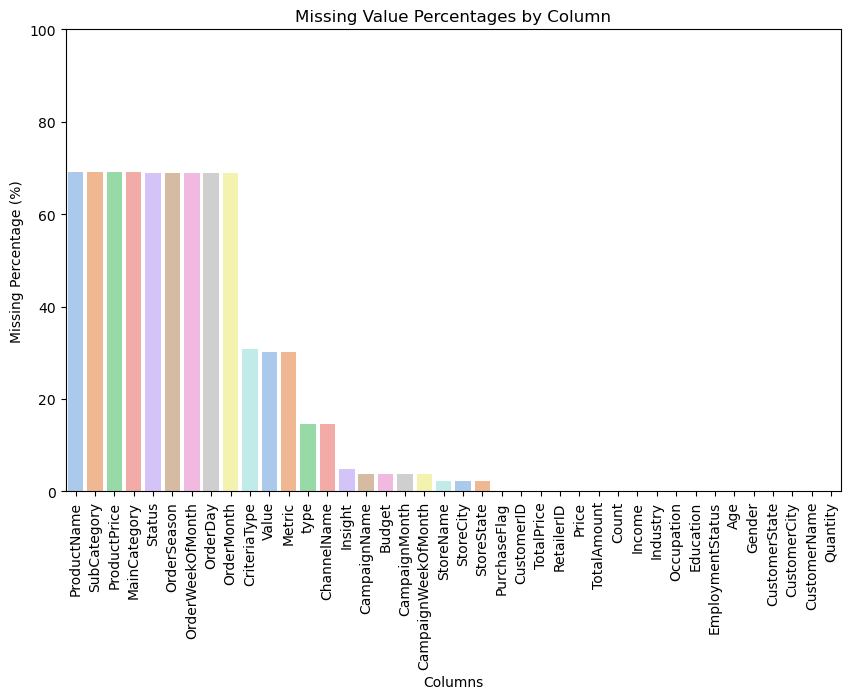

In [40]:
missing_percentages = round(df.isnull().mean() * 100, 2).sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x = missing_percentages.index, 
            y = missing_percentages, 
            palette = "pastel")

plt.xticks(rotation = 90)
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylim(0, 100)
plt.ylabel('Missing Percentage (%)')
plt.show()


Since most of the customers made no purchase, product related columns have high missing percentages. 

In [41]:
# print default value ('No Purchase' or 0) to the customers without any purchases
df.loc[df['PurchaseFlag'] == 0, ['ProductName', 'SubCategory', 'MainCategory', 'Status', 'CriteriaType', 'Metric']] = 'No Purchase'
df.loc[df['PurchaseFlag'] == 0, ['ProductPrice', 'OrderMonth', 'OrderDay', 'OrderSeason', 'OrderWeekOfMonth', 'Value', ]] = 0  # For numerical column

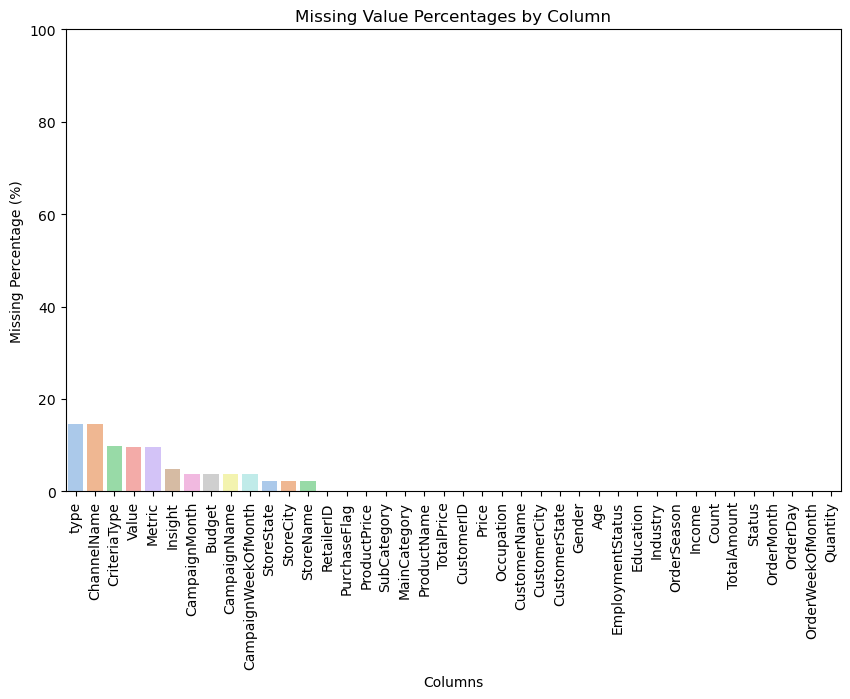

In [42]:
missing_percentages2 = round(df.isnull().mean() * 100, 2).sort_values(ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x = missing_percentages2.index, 
            y = missing_percentages2, 
            palette = "pastel")

plt.xticks(rotation = 90)
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylim(0, 100)
plt.ylabel('Missing Percentage (%)')
plt.show()

In [43]:
df_clean = df.dropna()

# check
df_clean.isna().sum().sum()

0

In [44]:
df_clean.head(3)

,CustomerID,RetailerID,CustomerName,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,...,Insight,CriteriaType,CampaignName,Budget,CampaignMonth,CampaignWeekOfMonth,Metric,Value,ChannelName,type
6,4,24,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Conversions,8892,Channel O2,podcast
7,4,24,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Clicks,3438,Channel O2,podcast
8,4,24,Nicholas Holloway,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Clicks,172,Channel O2,podcast
